# Knowledge Graph in Financial Applications

## Introduction

In the rapidly evolving landscape of financial services, the ability to analyze, interpret, and leverage complex relationships between entities such as customers, transactions, accounts, institutions, and financial instruments is of paramount importance. Traditional data structures, particularly relational databases, often struggle to effectively capture these interdependencies due to their rigid tabular format. Financial data, however, is inherently networked: customers interact with multiple institutions, transactions form intricate money flows, and companies are linked by ownership structures, partnerships, and supply chains. To address these challenges, **Knowledge Graphs (KGs) and Graph-Based Artificial Intelligence (Graph AI)** have emerged as powerful tools for **representing, querying, and reasoning over financial data**, enabling more effective decision-making, risk assessment, and regulatory compliance.

A **Knowledge Graph (KG)** is a structured representation of real-world entities and the relationships between them. Unlike traditional databases, which store data in tables with predefined relationships, knowledge graphs employ a **graph-based structure**, where nodes represent entities (such as individuals, organizations, or financial instruments) and edges represent relationships (such as ownership, transactions, or affiliations). This structure enables a more **flexible, contextual, and interconnected** representation of information, allowing financial institutions to derive **insights that would be difficult to extract from tabular data alone**.

Below is a simple Python program that creates and visualizes a basic Knowledge Graph using NetworkX and Matplotlib. This example models a financial transaction network where: 1) Customers own bank accounts, 2) Transactions occur between accounts.

In [87]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes (Customers, Accounts, Transactions)
G.add_node("Customer_A", type="Customer")
G.add_node("Customer_B", type="Customer")
G.add_node("Account_1", type="Account")
G.add_node("Account_2", type="Account")
G.add_node("Transaction_1", type="Transaction")
G.add_node("Transaction_2", type="Transaction")

# Add edges (Relationships)
G.add_edges_from([
    ("Customer_A", "Account_1"),  # Customer_A owns Account_1
    ("Customer_B", "Account_2"),  # Customer_B owns Account_2
    ("Account_1", "Transaction_1"),  # Account_1 initiates Transaction_1
    ("Transaction_1", "Account_2"),  # Transaction_1 transfers to Account_2
    ("Account_2", "Transaction_2"),  # Account_2 initiates Transaction_2
    ("Transaction_2", "Account_1")   # Transaction_2 transfers back to Account_1
])

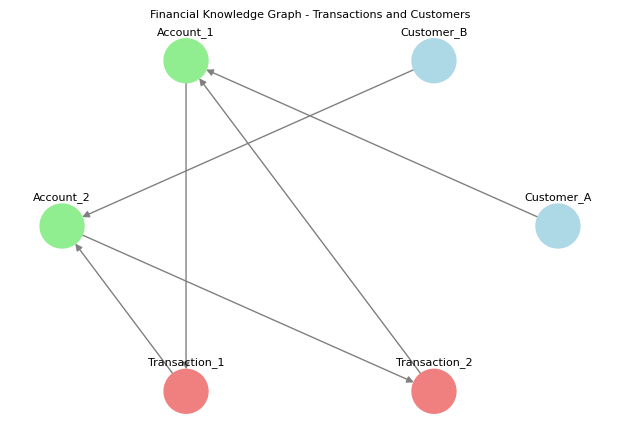

In [88]:
# Draw the graph
plt.figure(figsize=(6, 4))

#pos = nx.spring_layout(G)         # Position nodes for visualization
#pos = nx.kamada_kawai_layout(G)   # Avoids overlap, improves readability
pos = nx.circular_layout(G)       # Circular Layout

# Define node colors by type
color_map = {"Customer": "lightblue", "Account": "lightgreen", "Transaction": "lightcoral"}
node_colors = [color_map[G.nodes[n]["type"]] for n in G.nodes()]
#node_colors = ["red" if G.nodes[n].get("fraud", 0) == 1 else "blue" for n in G.nodes()]

# Improve label placement
label_positions = {node: (x, y + 0.15) for node, (x, y) in pos.items()}  # Moves labels slightly up

nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color="gray", node_size=1000)
nx.draw_networkx_labels(G, label_positions, font_size=8)

plt.title("Financial Knowledge Graph - Transactions and Customers", fontsize=8)
plt.show()

**Figure 1: Simple Financial Knowledge Graph**  

*This graph represents a basic financial transaction network modeled as a Knowledge Graph. It consists of three types of nodes: <ins>Customers</ins> (light blue), <ins>Bank Accounts</ins> (light green), and <ins>Transactions</ins> (light red). Directed edges indicate ownership and transactional relationships between entities: Customers own bank accounts (e.g., Customer_A owns Account_1); Transactions are initiated by accounts and move funds between them (e.g., Transaction_1 transfers funds from Account_1 to Account_2); Cyclic structures may indicate transactional loops, potentially useful for detecting fraud or unusual financial patterns. This graphical representation captures financial entity interactions in a structured format, enabling advanced analysis such as fraud detection, risk assessment, and financial relationship modeling*.

For instance, in a **fraud detection scenario**, a bank might need to investigate whether a particular customer is engaging in suspicious activity. A knowledge graph would allow analysts to **trace the customer’s connections to other accounts, identify indirect relationships through third parties, and detect patterns that suggest coordinated fraudulent behavior**. This capability is particularly valuable in detecting **money laundering networks**, where illicit funds are dispersed across multiple accounts to evade detection. By modeling financial data as a knowledge graph, banks can apply **graph traversal algorithms, centrality measures, and community detection techniques** to uncover hidden relationships that might otherwise go unnoticed.

### **Knowledge Graphs and Their Connection to Machine Learning**  

While knowledge graphs are valuable for structuring and querying data, their true potential is unlocked when combined with **machine learning techniques**, leading to what is commonly referred to as **Graph-Based AI**. The integration of knowledge graphs with machine learning enables advanced **pattern recognition, predictive modeling, and anomaly detection** in financial applications. This connection is facilitated by several key methodologies:

1. **Graph Representation Learning**  
   Traditional machine learning models are typically designed to operate on structured numerical data, but financial knowledge graphs contain **highly interconnected, heterogeneous, and relational data**. To bridge this gap, **graph representation learning** techniques such as **Node Embeddings** and **Graph Neural Networks (GNNs)** transform graph-based data into a numerical format that machine learning models can process. These techniques preserve the **topological structure of the graph**, ensuring that relational dependencies are captured in the learning process.

2. **Graph Neural Networks (GNNs)**  
   A major breakthrough in Graph-Based AI has been the development of **Graph Neural Networks (GNNs)**, which extend traditional deep learning architectures to operate on graph-structured data. Unlike conventional neural networks that process independent data points, GNNs leverage **message passing mechanisms**, where information propagates across nodes and edges. This enables the model to learn **contextualized representations of financial entities**, making it highly effective for tasks such as **fraud detection, credit risk assessment, and market forecasting**.

3. **Graph-Based Anomaly Detection**  
   In financial fraud detection, anomalies often manifest as unusual patterns of connections within a transaction network. Traditional anomaly detection techniques focus on outlier analysis within tabular data, but **Graph AI enables anomaly detection based on network structure and relationship strength**. Machine learning models trained on financial knowledge graphs can detect **subgraph patterns indicative of fraudulent activity**, such as **cyclical transactions, rapid fund transfers across multiple accounts, and abnormal clustering of entities**.

4. **Graph-Augmented Natural Language Processing (NLP)**  
   Financial institutions deal with vast amounts of **unstructured textual data**, including regulatory filings, news reports, earnings call transcripts, and customer service interactions. By integrating **Natural Language Processing (NLP) with knowledge graphs**, organizations can extract **semantic relationships from text** and enrich their financial knowledge graphs with insights derived from language models. For example, an AI system analyzing financial news might identify that "Company A is acquiring Company B," and automatically update a corporate knowledge graph with this newly discovered relationship.

5. **Reinforcement Learning on Knowledge Graphs**  
   Some financial decision-making tasks, such as **portfolio optimization and algorithmic trading**, require AI models that can dynamically adjust their strategies based on market conditions. Reinforcement learning, a subset of machine learning where agents learn through trial and error, can be enhanced using **knowledge graphs as an underlying structure for decision-making**. This approach allows AI agents to **navigate complex financial networks, model dependencies between assets, and optimize investment strategies based on relational insights**.

### **Examples of Knowledge Graphs in Financial Applications**  

To illustrate the practical implications of knowledge graphs in finance, consider the following examples:

- **Fraud Detection and Anti-Money Laundering (AML):** A financial institution builds a knowledge graph where each node represents a customer, an account, or a transaction, and edges indicate the movement of funds between them. By applying **graph-based clustering algorithms**, the institution can detect anomalies such as **highly interconnected subgraphs indicative of money laundering rings**.

- **Credit Scoring and Loan Underwriting:** A bank leverages a knowledge graph to integrate **traditional credit data (income, payment history) with alternative data sources** such as social relationships, employment history, and transaction behaviors. This allows for **a more nuanced and dynamic assessment of creditworthiness**, reducing the reliance on static credit scores.

- **Market Intelligence and Investment Research:** An asset management firm constructs a financial knowledge graph linking **companies, executives, regulatory filings, supply chain relationships, and macroeconomic indicators**. By incorporating real-time **news sentiment analysis** and **earnings report trends**, the firm can generate **context-aware investment recommendations**.

- **Regulatory Compliance and Risk Management:** A multinational bank develops a knowledge graph to **map its entire global entity structure**, linking **subsidiaries, joint ventures, and compliance obligations** across jurisdictions. This enables the compliance team to **automate regulatory reporting, monitor evolving compliance risks, and detect potential violations**.

### **The Future of Knowledge Graphs and Graph-Based AI in Finance**  

As financial systems become increasingly complex, **Graph-Based AI is poised to play an even greater role in enabling intelligent decision-making, enhancing regulatory transparency, and mitigating financial risks**. The integration of **Graph Neural Networks (GNNs), self-supervised learning, and automated reasoning** will further expand the capabilities of knowledge graphs, making them a critical component of next-generation financial AI systems. Moreover, advances in **federated learning and privacy-preserving AI** will allow financial institutions to **collaborate on shared knowledge graphs** without compromising sensitive customer data.

In conclusion, the adoption of knowledge graphs in finance represents a paradigm shift in **how institutions model, analyze, and act on financial data**. By structuring financial relationships in a graph-based format and applying **advanced machine learning techniques**, banks, investment firms, and regulatory bodies can unlock new levels of efficiency, accuracy, and strategic insight. As research in **graph-based AI continues to evolve**, its applications in finance are expected to grow, offering unprecedented opportunities for **fraud detection, market intelligence, credit assessment, and beyond**.

## Frau Detection: a Toy Model Example

Here’s a practical **Python implementation of a financial Knowledge Graph** using **NetworkX** (for graph representation) and **PyTorch Geometric** (for Graph Neural Networks). The example focuses on **fraud detection in banking transactions** using a knowledge graph.


### **Objective**  
We will:
1. **Build a Knowledge Graph** where:
   - **Nodes** represent customers, bank accounts, and transactions.
   - **Edges** represent relationships (e.g., "owns", "transfers money to").

---

2. **Visualize the Graph** using `NetworkX` and `Matplotlib`.

---

3. **Apply Graph-Based AI** using **Graph Neural Networks (GNNs)** to classify fraudulent transactions.

---

**Step 1: Install Required Libraries**
Make sure you have these dependencies installed before running the code:

```bash
pip install networkx matplotlib torch torch-geometric
```

**Step 2: Build a Knowledge Graph for Banking Transactions**
We will create a simple **Knowledge Graph** where:
- Customers **own** bank accounts.
- Accounts are involved in **transactions**.
- Some transactions are **fraudulent** (which we aim to detect).


In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

In [67]:
# Create an empty directed graph
G = nx.DiGraph()

In [68]:
# -----------------------------------------------
# Define Nodes for a Financial Knowledge Graph
# -----------------------------------------------

# General Syntax of the add_node() Method:
# G.add_node(node_id, key1=value1, key2=value2, ...)
# - node_id: Unique identifier for the node (e.g., "Customer_A", "Account_1").
# - key=value: Optional attributes describing the node (e.g., type, fraud label).

# Customers: Represent individuals who own bank accounts
G.add_node("Customer_A", type="Customer")  
G.add_node("Customer_B", type="Customer")  
G.add_node("Customer_C", type="Customer")  

# Bank Accounts: Represent financial accounts linked to customers
G.add_node("Account_1", type="Account")  
G.add_node("Account_2", type="Account")  
G.add_node("Account_3", type="Account")  

# Transactions: Represent money transfers between bank accounts
# The 'fraud' attribute is used to label transactions as either:
# - fraud=0 → Legitimate transaction
# - fraud=1 → Fraudulent transaction (suspicious or confirmed fraud)
G.add_node("Transaction_1", type="Transaction", fraud=0)  # Normal transaction
G.add_node("Transaction_2", type="Transaction", fraud=1)  # Marked as fraudulent


In [69]:
# -------------------------------------------------
# Define Edges (Relationships) for the Knowledge Graph
# -------------------------------------------------

# General Syntax of the add_edges_from() Method:
# G.add_edges_from([(node1, node2), (node3, node4), ...])
# - Each tuple (nodeX, nodeY) represents a directed edge from nodeX to nodeY.
# - An edge implies a **relationship** between two entities.
# - If the graph is **directed**, the edge goes FROM the first node TO the second node.

# Adding relationships between entities:
G.add_edges_from([
    ("Customer_A", "Account_1"),  # Customer_A owns Account_1
    ("Customer_B", "Account_2"),  # Customer_B owns Account_2
    ("Customer_C", "Account_3"),  # Customer_C owns Account_3
    ("Account_1", "Transaction_1"),  # Account_1 initiates Transaction_1
    ("Account_2", "Transaction_2"),  # Account_2 initiates Transaction_2
    ("Transaction_1", "Account_3"),  # Transaction_1 transfers funds to Account_3
    ("Transaction_2", "Account_1"),  # Transaction_2 transfers funds to Account_1
])

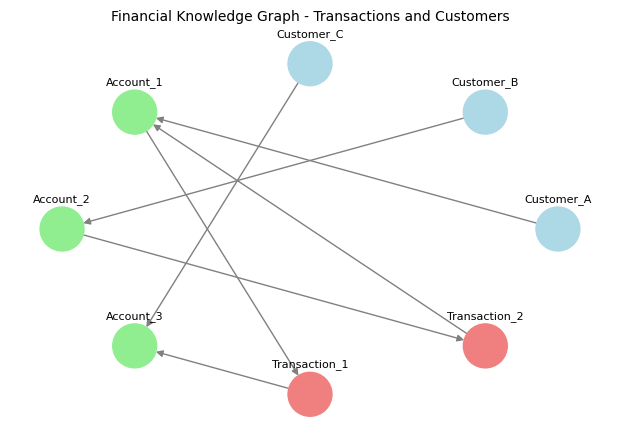

In [72]:
# Draw the graph
plt.figure(figsize=(6, 4))

#pos = nx.spring_layout(G)         # Position nodes for visualization
#pos = nx.kamada_kawai_layout(G)   # Avoids overlap, improves readability
pos = nx.circular_layout(G)       # Circular Layout

# Define node colors by type
color_map = {"Customer": "lightblue", "Account": "lightgreen", "Transaction": "lightcoral"}
node_colors = [color_map[G.nodes[n]["type"]] for n in G.nodes()]
#node_colors = ["red" if G.nodes[n].get("fraud", 0) == 1 else "blue" for n in G.nodes()]

# Improve label placement
label_positions = {node: (x, y + 0.18) for node, (x, y) in pos.items()}  # Moves labels slightly up

nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color="gray", node_size=1000)
nx.draw_networkx_labels(G, label_positions, font_size=8)

plt.title("Financial Knowledge Graph - Transactions and Customers", fontsize=10)
plt.show()

**Step 3: Convert Knowledge Graph to PyTorch Geometric Format**

To apply machine learning, we need to **convert the graph into tensors** that a **Graph Neural Network (GNN)** can process.

In [73]:
# Convert nodes to integer indices
node_mapping = {node: i for i, node in enumerate(G.nodes())}
print(node_mapping)

{'Customer_A': 0, 'Customer_B': 1, 'Customer_C': 2, 'Account_1': 3, 'Account_2': 4, 'Account_3': 5, 'Transaction_1': 6, 'Transaction_2': 7}


In [74]:
# -----------------------------------------------------------------------
# Convert NetworkX Graph Edges to PyTorch Geometric Format
# -----------------------------------------------------------------------

# PyTorch Geometric requires graph edges to be in "edge index" format:
# - This is a 2D tensor of shape [2, num_edges]
# - Each column represents a directed edge in the graph as [source_node, target_node]

# The edge_index tensor is created by:
# 1. Iterating over all edges in the NetworkX graph G.edges()
# 2. Mapping each node (src, dst) from its string label to an integer index
#    using the node_mapping dictionary (previously created)
# 3. Storing these integer pairs as a list of [source, target] edges
# 4. Converting this list into a PyTorch tensor
# 5. Applying .t() (transpose) to match PyTorch Geometric’s required format
# 6. Calling .contiguous() to ensure memory efficiency

edge_index = torch.tensor(
    [[node_mapping[src], node_mapping[dst]] for src, dst in G.edges()],  # Convert node names to integer indices
    dtype=torch.long  # Ensure tensor is of type long (required for graph operations)
).t().contiguous()  # Transpose to shape [2, num_edges] and optimize memory layout
print(edge_index)

tensor([[0, 1, 2, 3, 4, 6, 7],
        [3, 4, 5, 6, 7, 5, 3]])


In [75]:
# -----------------------------------------------------------------------
# Create Node Features as One-Hot Encoded Vectors
# -----------------------------------------------------------------------

# PyTorch Geometric requires node features (x) to be stored as a tensor.
# In this case, we use a simple One-Hot Encoding to represent different types of nodes.

# One-Hot Encoding assigns a unique binary vector to each node type:
# - "Customer"    → [1, 0, 0]
# - "Account"     → [0, 1, 0]
# - "Transaction" → [0, 0, 1]
# This allows the GNN model to differentiate between different financial entities.

node_features = []  # Initialize an empty list to store feature vectors

for node in G.nodes():  # Iterate over all nodes in the NetworkX graph
    node_type = G.nodes[node]["type"]  # Retrieve the type of entity (Customer, Account, Transaction)
    
    # Assign a one-hot encoded vector based on the node type
    if node_type == "Customer":
        node_features.append([1, 0, 0])  # Customer → One-Hot Encoding [1, 0, 0]
    elif node_type == "Account":
        node_features.append([0, 1, 0])  # Account  → One-Hot Encoding [0, 1, 0]
    else:
        node_features.append([0, 0, 1])  # Transaction → One-Hot Encoding [0, 0, 1]
print(node_features)

[[1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1]]


In [76]:
# -----------------------------------------------------------------------
# Convert Node Features List to a PyTorch Tensor
# -----------------------------------------------------------------------

# The node_features list, created in the previous step, contains one-hot encoded 
# feature vectors for each node in the graph. However, PyTorch Geometric requires 
# features to be in tensor format for efficient computation.

# This line performs the following:
# 1. Converts the 'node_features' list (which contains lists of numerical values)
#    into a PyTorch tensor.
# 2. Specifies dtype=torch.float to ensure that the tensor is in floating-point format,
#    which is required for most neural network computations in PyTorch.
# 3. The resulting tensor 'x' will be used as the input node features in the GNN model.
#
x = torch.tensor(node_features, dtype=torch.float)
print(x)

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])


In [77]:
# -----------------------------------------------------------------------
# Create Labels for Fraud Detection
# -----------------------------------------------------------------------

# PyTorch Geometric requires a label tensor (y) to supervise training in a classification task.
# In this case, we define labels for fraud detection, where:
# - "1" → Fraudulent Transaction
# - "0" → Legitimate Transaction
#
# This line performs the following:
# 1. Iterates over all nodes in the NetworkX graph (G.nodes()).
# 2. Retrieves the "fraud" attribute from each node using .get("fraud", 0).
#    - If the node has the "fraud" attribute (e.g., transactions), it uses its value (0 or 1).
#    - If the node does NOT have a "fraud" attribute (e.g., customers, accounts), it defaults to 0.
# 3. Constructs a list of labels, which is then converted into a PyTorch tensor.
# 4. Uses dtype=torch.long because classification labels in PyTorch must be in long integer format.

y = torch.tensor([G.nodes[node].get("fraud", 0) for node in G.nodes()], dtype=torch.long)
print(y)

tensor([0, 0, 0, 0, 0, 0, 0, 1])


In [78]:
# -----------------------------------------------------------------------
# Build the PyTorch Geometric Data Object
# -----------------------------------------------------------------------

# PyTorch Geometric requires all graph components (nodes, edges, and labels)
# to be stored in a single 'Data' object for model training and evaluation.
#
# The Data() object combines:
# 1. x: Node features (a tensor containing one-hot encoded entity types)
# 2. edge_index: Graph connectivity (a tensor storing directed edges in [2, num_edges] format)
# 3. y: Labels (a tensor indicating whether each transaction is fraudulent or legitimate)
#
# This unified data structure allows efficient batch processing in Graph Neural Networks (GNNs).

data = Data(x=x, edge_index=edge_index, y=y)

# Print the Data object to verify its structure and attributes
print(data)

Data(x=[8, 3], edge_index=[2, 7], y=[8])


**Step 4: Define a Graph Neural Network (GNN) for Fraud Detection**

We will use a **Graph Convolutional Network (GCN)** to classify fraudulent transactions based on graph relationships.

In [79]:
# -----------------------------------------------------------------------------
# Graph Convolutional Network (GCN) for Fraud Detection in PyTorch Geometric
# -----------------------------------------------------------------------------
# This code defines a Graph Neural Network (GNN) architecture called a Graph 
# Convolutional Network (GCN). The network takes as input a graph represented 
# by node features and connections (edges) and predicts classes (e.g., fraudulent
# vs. legitimate transactions).
#
# Structure of the model:
# - The network consists of two graph convolution layers:
#   - First convolution layer reduces input features to 16-dimensional embeddings.
#   - Second convolution layer maps embeddings to the desired number of classes.
# - Between the two layers, a ReLU activation function introduces non-linearity.
# - Finally, a log-softmax activation produces probability distributions over 
#   output classes.
# -----------------------------------------------------------------------------

class GCN(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        # Initialize the parent class (torch.nn.Module)
        super(GCN, self).__init__()

        # First Graph Convolutional Layer:
        # - Input dimension: num_features (original node features)
        # - Output dimension: 16 (intermediate feature embeddings)
        self.conv1 = GCNConv(num_features, 16)

        # Second Graph Convolutional Layer (output layer):
        # - Input dimension: 16 (from previous layer)
        # - Output dimension: num_classes (final predictions, e.g., fraud/no fraud)
        self.conv2 = GCNConv(16, num_classes)

    def forward(self, data):
        # Extract node feature matrix (x) and edge connectivity (edge_index)
        x, edge_index = data.x, data.edge_index

        # First convolutional layer:
        # - Apply graph convolution using node features and edges
        x = self.conv1(x, edge_index)

        # Apply ReLU activation function:
        # - Introduces non-linearity, improving the model's ability to learn complex patterns
        x = F.relu(x)

        # Second convolutional layer:
        # - Generate final node representations used for classification
        x = self.conv2(x, edge_index)

        # Apply log-softmax activation function:
        # - Converts output into log-probabilities suitable for multi-class classification
        return F.log_softmax(x, dim=1)

In [80]:
# Define model
model = GCN(num_features=3, num_classes=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

**Step 5: Train the Model**

We train the model to classify fraudulent transactions.

In [81]:
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

In [82]:
# Train for 100 epochs
for epoch in range(100):
    loss = train()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.7579
Epoch 10, Loss: 0.4090
Epoch 20, Loss: 0.3174
Epoch 30, Loss: 0.2773
Epoch 40, Loss: 0.2373
Epoch 50, Loss: 0.2000
Epoch 60, Loss: 0.1649
Epoch 70, Loss: 0.1330
Epoch 80, Loss: 0.1065
Epoch 90, Loss: 0.0848


In [21]:
# Evaluate Model
model.eval()
with torch.no_grad():
    predictions = model(data).argmax(dim=1)
    print("Predicted Labels:", predictions.tolist())
    print("Actual Labels:   ", data.y.tolist())

Predicted Labels: [0, 0, 0, 0, 0, 0, 0, 1]
Actual Labels:    [0, 0, 0, 0, 0, 0, 0, 1]


**Results and Interpretation**

- The model predicts which **transactions are fraudulent** based on the relationships in the knowledge graph.
- The **graph structure helps capture patterns that tabular methods might miss** (e.g., fraud rings).
- We can **expand the graph** by adding real-world banking data, such as **multiple customers, transactions, and accounts**.

This implementation demonstrates how **Knowledge Graphs and Graph-Based AI** can enhance fraud detection in banking. Unlike traditional machine learning models that treat transactions as independent data points, **Graph AI captures the hidden relationships** between entities, making it more effective in identifying fraud patterns. Future improvements could include **Graph Attention Networks (GATs)**, **Temporal Graph Neural Networks (TGNNs)** for time-series transactions, and integration with **real-world banking datasets**.

## References and Credits